# Google Playstore Apps Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [54]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [55]:
df.duplicated().sum()

483

In [56]:
df.shape

(10841, 13)

In [57]:
df = df.drop_duplicates()

In [58]:
df = df.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [59]:
df.shape

(10358, 10)

In [60]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
dtype: int64

In [61]:
# Removing the row which is unstructured 
df = df[df['Reviews'] != '3.0M']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
dtypes: float64(1), object(9)
memory usage: 890.1+ KB


In [63]:
# Converting the data type of App and Category column
df['App'] = df['App'].astype('string')
df['Category'] = df['Category'].astype('string')

In [64]:
# Checking the NaN values in Rating column
df['Rating'].isnull().sum()

1465

In [65]:
# Filling NaN values with categorywise using median 

df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

In [66]:
df['Reviews'] = df['Reviews'].astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
dtypes: float64(1), int32(1), object(6), string(2)
memory usage: 849.6+ KB


In [68]:
# Function to convert 'Size' values
def convert_size(size):
    if isinstance(size, str):
        size = size.strip()  # Remove extra spaces
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))  # Remove 'K' and keep numeric KB
    return np.nan  # Convert "Varies with device" to NaN

# Apply the conversion
df['Size'] = df['Size'].apply(convert_size)

# Fill NaN values with the median size 
df['Size'] = df['Size'].fillna(df['Size'].median())

# Convert 'Size' to integer 
df['Size'] = df['Size'].astype(int)

In [69]:
df.iloc[10345:10357]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.60,603,7577,"10,000+",Free,0,Everyone,Books & Reference
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.80,881,2355,"100,000+",Free,0,Everyone,News & Magazines
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.20,38,10035,"5,000+",Free,0,Everyone,Maps & Navigation
10832,FR Tides,WEATHER,3.80,1195,582,"100,000+",Free,0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.80,44,619,"1,000+",Free,0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.00,7,2662,500+,Free,0,Everyone,Education
10835,FR Forms,BUSINESS,4.25,0,9830,10+,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.50,38,54272,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3686,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.30,3,9728,"1,000+",Free,0,Everyone,Medical


In [70]:
df.shape

(10357, 10)

In [71]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
dtype: int64

In [72]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [73]:
# Removing + in installs column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)

In [74]:
# Converting the data type of installs column
df['Installs'] = df['Installs'].astype(int)

In [75]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908,5000000,Free,0,Everyone,Art & Design


In [76]:
df['Type'].isnull().sum()

1

In [77]:
# Filling the NaN values in Type column
df['Type'] = df['Type'].fillna(df['Type'].mode())[0]

In [78]:
# Converting the data type of Type column
df['Type'] = df['Type'].astype('string')

In [79]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [81]:
df['Price'] = df['Price'].replace({r'\$': ''}, regex=True).astype(float)

In [82]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728,1000,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13312,1000,Free,0.0,Mature 17+,Books & Reference


In [83]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [84]:
df[df['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
7312,Best CG Photography,FAMILY,4.3,1,2560,500,Free,0.0,Unrated,Entertainment
8266,DC Universe Online Map,TOOLS,4.1,1186,6553,50000,Free,0.0,Unrated,Tools


In [85]:
# As most of the Family and tools category have the content rating as everyone so we replace unrated to everyone.
df['Content Rating'] = df['Content Rating'].replace('Unrated', 'Everyone')
# Converting the Everyone 10+ to teen because their is less difference between them.
df['Content Rating'] = df['Content Rating'].replace(['Teen', 'Everyone 10+'], 'Teen')
# Converting the Mature 17+ to Adults because their is less difference between them.
df['Content Rating'] = df['Content Rating'].replace(['Mature 17+', 'Adults only 18+'], 'Adults')

In [86]:
df['Content Rating'] = df['Content Rating'].astype('string')

In [87]:
# From genre column removing everything after ';'.
df['Genres'] = df['Genres'].apply(lambda x: x.split(';')[0])
df['Genres'] = df['Genres'].astype('string')

In [88]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336,500000,Free,0.0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867,100000,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728,1000,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13312,1000,Free,0.0,Adults,Books & Reference


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  string 
 1   Category        10357 non-null  string 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  int32  
 5   Installs        10357 non-null  int32  
 6   Type            10357 non-null  string 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  string 
 9   Genres          10357 non-null  string 
dtypes: float64(2), int32(3), string(5)
memory usage: 1.0 MB


In [90]:
df.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres']

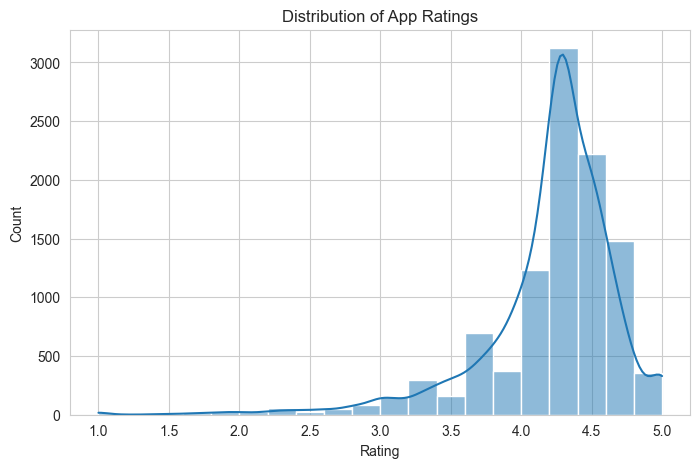

In [91]:
sns.set_style("whitegrid")

# 1. Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

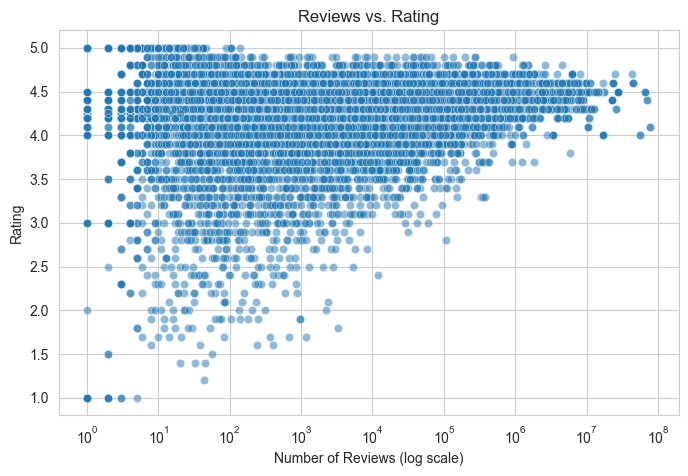

In [92]:
# 3. Reviews vs. Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Reviews', y='Rating', alpha=0.5)
plt.xscale("log")  # Log scale for better visibility
plt.title('Reviews vs. Rating')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Rating')
plt.show()

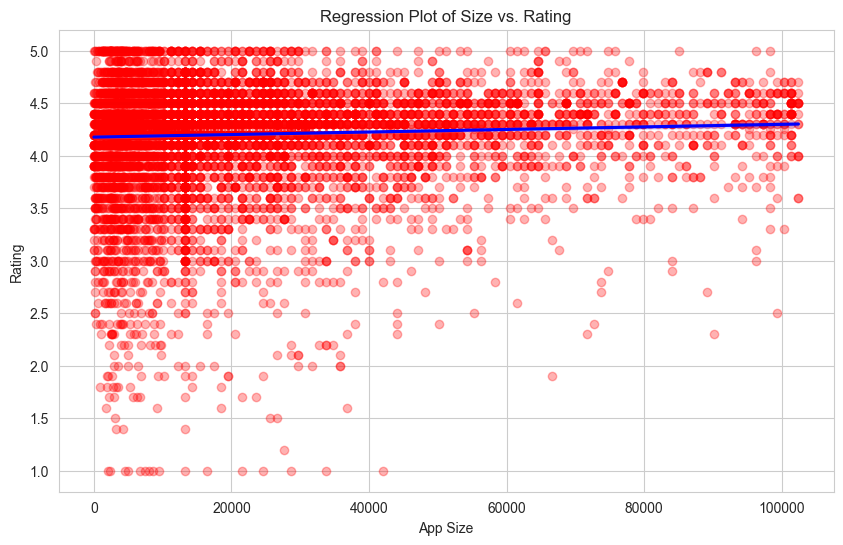

In [105]:
# Regression Plot: Size vs. Rating
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Size', y='Rating', scatter_kws={'alpha':0.3},color = 'r', line_kws={'color':'blue'})
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.title('Regression Plot of Size vs. Rating')
plt.show()

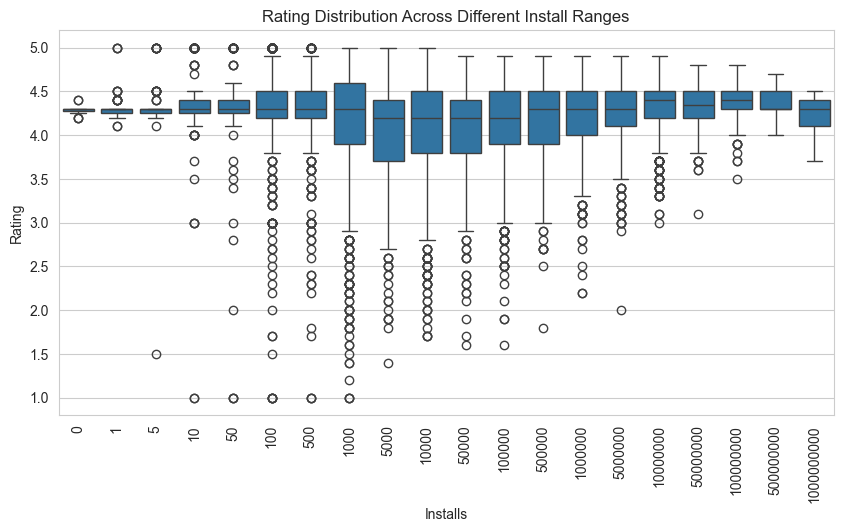

In [292]:
# 5. Installs vs. Rating
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Installs'], y=df['Rating'])
plt.xticks(rotation=90)
plt.title('Rating Distribution Across Different Install Ranges')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

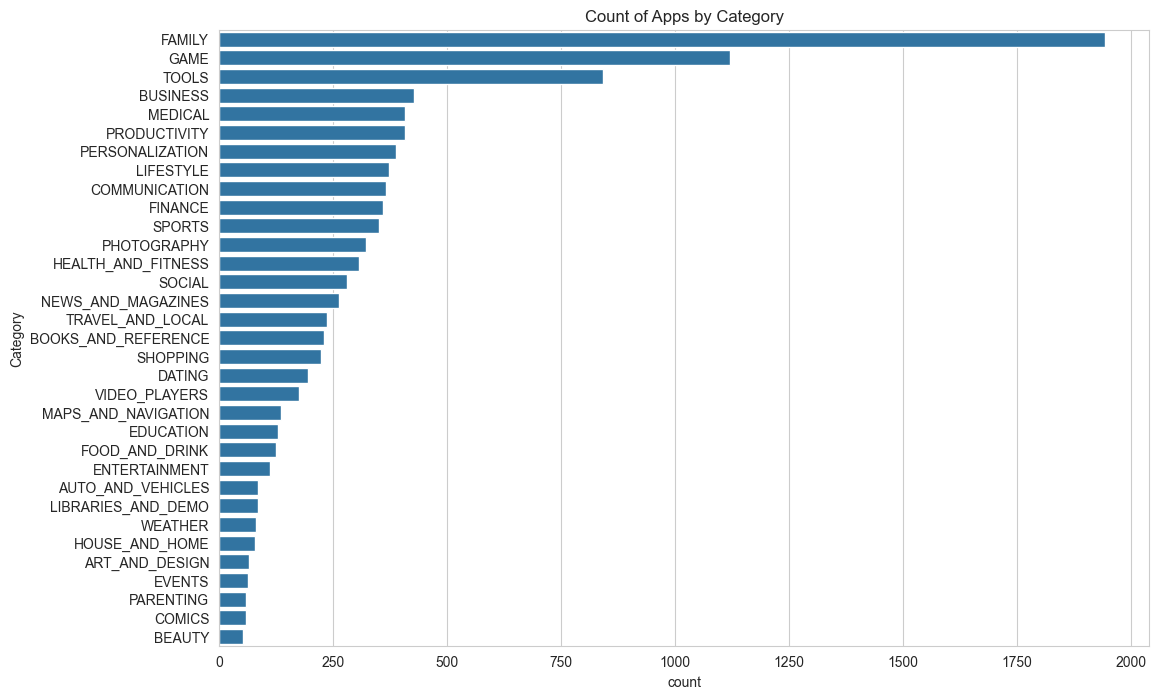

In [301]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data = df, order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

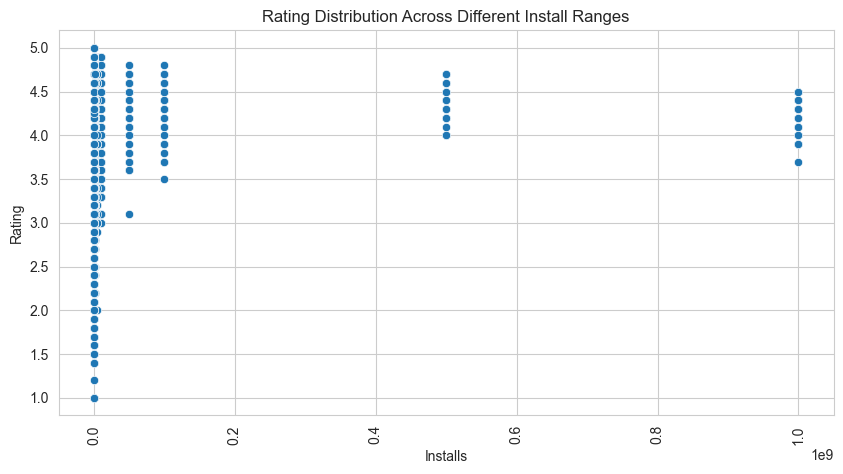

In [107]:
# 5. Installs vs. Rating
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Installs'], y=df['Rating'])
plt.xticks(rotation=90)
plt.title('Rating Distribution Across Different Install Ranges')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

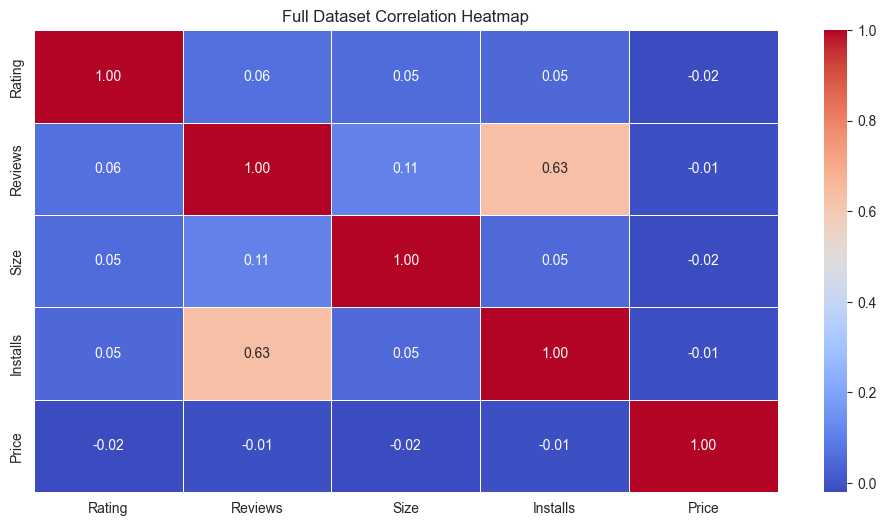

In [110]:
# Heat map

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Full Dataset Correlation Heatmap')
plt.show()

<Figure size 1600x600 with 0 Axes>

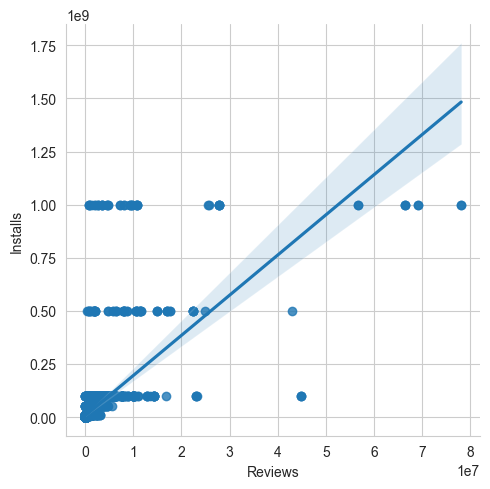

In [307]:
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend

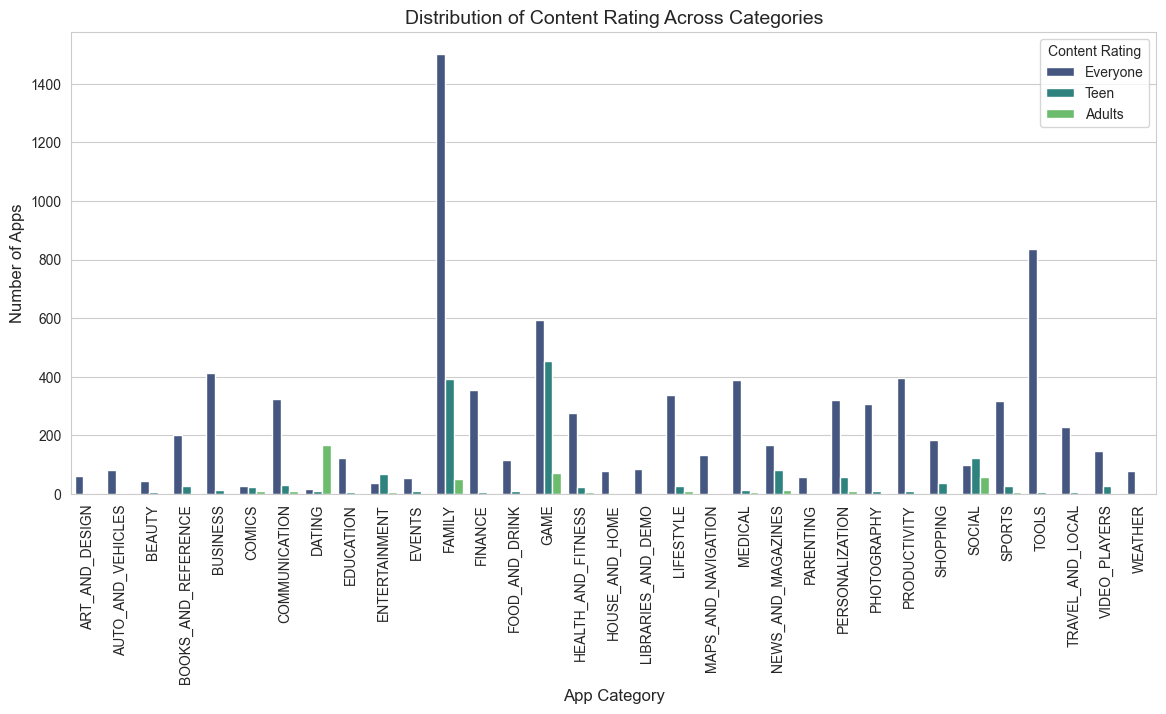

In [119]:
# Count the number of apps for each (Category, Content Rating) combination
content_category_counts = df.groupby(['Category', 'Content Rating']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=content_category_counts, x='Category', y='Count', hue='Content Rating', palette='viridis')

plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel("App Category", fontsize=12)
plt.ylabel("Number of Apps", fontsize=12)
plt.title("Distribution of Content Rating Across Categories", fontsize=14)
plt.legend(title="Content Rating")
plt.show()

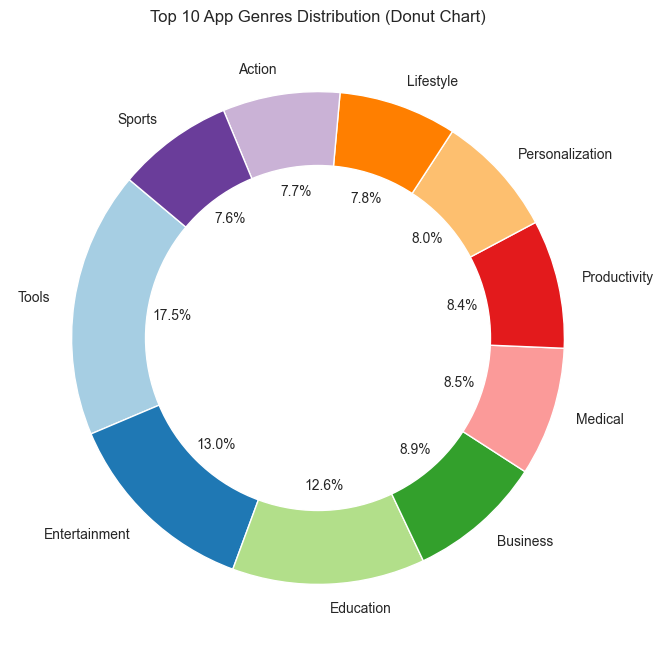

In [116]:
# Count occurrences of each genre
genre_counts = df['Genres'].value_counts()

# Limit to top 10 genres for better readability
top_genres = genre_counts[:10]

# Donut chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'white'})

# Draw a circle in the middle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Top 10 App Genres Distribution (Donut Chart)")
plt.show()

In [134]:
# Most popular apps (by installs)
most_installed_apps = df[['App','Installs']].sort_values(by='Installs',ascending=False).head(10)
most_installed_apps

,App,Installs
341,Hangouts,1000000000
3928,YouTube,1000000000
451,Gmail,1000000000
3996,Google Chrome: Fast & Secure,1000000000
1700,Subway Surfers,1000000000
3454,Google Drive,1000000000
2808,Google Photos,1000000000
865,Google Play Games,1000000000
2853,Google Photos,1000000000
411,Google Chrome: Fast & Secure,1000000000


In [121]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,10000,Free,0.0,Everyone,Art & Design


In [130]:
# most rated category
# Group by 'Category' and calculate the average rating
most_rated_category = df.groupby('Category', as_index=False)['Rating'].mean()

# Sort by Rating in descending order and select the top 10
most_rated_category = most_rated_category.sort_values(by='Rating', ascending=False).head(10)

most_rated_category

,Category,Rating
10,EVENTS,4.454688
3,BOOKS_AND_REFERENCE,4.382609
8,EDUCATION,4.376154
0,ART_AND_DESIGN,4.360000
23,PERSONALIZATION,4.347165
22,PARENTING,4.316667
15,HEALTH_AND_FITNESS,4.295752
2,BEAUTY,4.283019
14,GAME,4.282070
27,SOCIAL,4.260714


In [135]:
# most reviewed category
# Group by 'Category' and calculate the average rating
most_reviewed_category = df.groupby('Category', as_index=False)['Reviews'].mean()

# Sort by Rating in descending order and select the top 10
most_reviewed_category = most_reviewed_category.sort_values(by='Reviews', ascending=False).head(10)
most_reviewed_category

,Category,Reviews
27,SOCIAL,1.905632e+06
6,COMMUNICATION,1.642824e+06
14,GAME,1.262745e+06
24,PHOTOGRAPHY,6.344640e+05
31,VIDEO_PLAYERS,6.307439e+05
9,ENTERTAINMENT,4.285650e+05
26,SHOPPING,4.237998e+05
29,TOOLS,3.240629e+05
25,PRODUCTIVITY,2.519767e+05
30,TRAVEL_AND_LOCAL,2.344522e+05
